# LangGraph is a powerful tool for building stateful, multi-actor applications with Large Language Models (LLMs)

In [26]:
!pip install pinecone-client
!pip install langgraph
!pip install langchain_groq
!pip install faiss-cpu
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


In [19]:
from pinecone import Pinecone, ServerlessSpec
pc = Pinecone(api_key=pine_cone)

index_name = "testpurpose"
pc.create_index(
    name=index_name,
    dimension=256,
    metric="cosine", #
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    )
)

In [22]:
print(pc.list_indexes())     # List all indexes

{'indexes': [{'deletion_protection': 'disabled',
              'dimension': 256,
              'host': 'testpurpose-9tg0h4c.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'testpurpose',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}}]}


In [23]:
index = pc.Index(index_name)  #to connect the index

In [38]:
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    verbose=False,
    temperature=0.2
)

In [39]:
llm.invoke("Do you know who is the best perosn in the world").content

'What a subjective and intriguing question! The concept of the "best person in the world" is highly dependent on individual perspectives, values, and criteria. It\'s challenging to pinpoint a single person who would be universally considered the best.\n\nDifferent people might have varying opinions based on factors like:\n\n1. Achievements: Some might consider individuals with remarkable accomplishments, such as Nobel laureates, innovators, or humanitarians.\n2. Influence: Others might look at people who have had a significant impact on society, like leaders, artists, or thought leaders.\n3. Kindness and compassion: Many would argue that the best person is someone who consistently demonstrates empathy, kindness, and selflessness.\n4. Personal qualities: Some might prioritize traits like integrity, humility, or resilience.\n\nGiven the diversity of human experiences and values, it\'s unlikely that there\'s a single person who would be universally regarded as the best. Moreover, the conc

In [41]:
!pip install langsmith
!pip install langgraph
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.4 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=49083405daa1420b9c6001182ff6aa73a9de4b761a9bee14a5b1e63b8afe6c71
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=98c4ac1a79c4738f00a30f1b649aeb60c7f55ffa38c8727da2c7a8f0c5aacaa5
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built wikipedia sgmllib3k


In [44]:
#langsmith is used to monitor the langchaina app - it help to monitor the app like debugging,alert on issue and workflow visualizing.

In [48]:
from google.colab import userdata
langsmith=userdata.get('lang_smith')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGSMITH_API_KEY"] = langsmith
os.environ["LANGCHAIN_PROJECT"] = "langchain"

In [54]:
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.memory import VectorStoreRetrieverMemory
from langchain.schema.output_parser import StrOutputParser

In [113]:
#LANGGRAPH dependecies
from pydantic import BaseModel, Field
import langchain,langchain_community,langgraph
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from pydantic.v1 import Field
from typing import TypedDict
from typing_extensions import Annotated  #this is used for managing state class

In [53]:
#external tools
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

In [58]:
#Define the tools
wiki_api = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)
arxiv_api = ArxivAPIWrapper(top_k_results=5,doc_content_chars_max=500)
wiki_tool = WikipediaQueryRun(api_wrapper=wiki_api)
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_api)

print(f"tools are:{wiki_tool} and {arxiv_tool}")

tools are:api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/usr/local/lib/python3.11/dist-packages/wikipedia/__init__.py'>, top_k_results=5, lang='en', load_all_available_meta=False, doc_content_chars_max=500) and api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=5, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=500)


In [59]:
wiki_tool.invoke("Who is elonmusk?")

'Page: Views of Elon Musk\nSummary: Elon Musk is the CEO or owner of multiple companies including Tesla, SpaceX, and X Corp., and has expressed many views on a wide variety of subjects, ranging from politics to science.\nMusk has often been described as libertarian, but described himself as "politically moderate" until 2022. Following the COVID-19 pandemic, his views have also been described as becoming more right-wing and conservative over time, sometimes being described as far-right. Within the c'

In [104]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [105]:
from langgraph.prebuilt import ToolNode,tools_condition #that will use for define the nodes and condition on basis on that llm will take the steps

In [118]:
class State(TypedDict):
  messages : Annotated[list,add_messages]  #append this message in the form of list

graph_builder = StateGraph(State)

#2: bind llm with the tools
llm_with_tools=llm.bind_tools(tools=[arxiv_tool,wiki_tool])


#3: define our chatbot
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

#entire flow of the execution
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot") #start node is connected with chabot
tool_node=ToolNode(tools=[arxiv_tool,wiki_tool])
graph_builder.add_node("tools",tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition  #bidirection itself with the chatbot
)
# graph_builder.add_edge("tools","chatbot") #tools node is connected with chatbot
graph_builder.add_edge("tools",END) #end node is connected with tools

graph_built = graph_builder.compile()

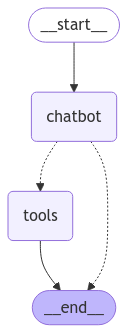

In [119]:
from IPython.display import display,Image
try:
  display(Image(graph_built.get_graph().draw_mermaid_png()))
except:
  "you may have some error"


In [141]:
events=graph_built.stream ({
    "messages" : ["user","write a love letter for my girlfriend?"]
},stream_mode="values")

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

write a love letter for my girlfriend?
================================== Ai Message ==================================

I'd be happy to help you write a love letter for your girlfriend. Here's a draft letter:

"My dearest [girlfriend's name],

Every moment I spend with you is a gift, a reminder of the love and joy that you bring into my life. From the moment I met you, I knew that you were someone special, and every day since then has only reaffirmed that feeling.

Your smile is the brightest light in my world, illuminating even the darkest of days. Your laughter is music to my ears, a sound that fills my heart with happiness and my soul with joy. Your touch is a flame that sets my heart ablaze, a burning passion that never fades.

You are my best friend, my partner, and my soulmate. You make me feel seen, heard, and understood in a way that no one else ever has. You challenge me to be my best self, to g

In [140]:
user_input = "write a c++ code to built a calcualtor?"

events = graph_built.stream(
    {"messages" : [("user" , user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

write a c++ code to built a calcualtor?
================================== Ai Message ==================================

Here's a simple implementation of a calculator in C++ that supports addition, subtraction, multiplication, and division:

```cpp
#include <iostream>
using namespace std;

int main() {
    int choice;
    float num1, num2;

    cout << "Simple Calculator" << endl;
    cout << "1. Addition" << endl;
    cout << "2. Subtraction" << endl;
    cout << "3. Multiplication" << endl;
    cout << "4. Division" << endl;
    cout << "5. Exit" << endl;

    while (true) {
        cout << "Enter your choice: ";
        cin >> choice;

        if (choice == 5) {
            break;
        }

        if (choice < 1 || choice > 5) {
            cout << "Invalid choice. Please choose a valid option." << endl;
            continue;
        }

        cout << "Enter first number: ";
        cin >> num1;
 

In [142]:
events=graph_built.stream ({
    "messages" : ["user","Write the detail of research paper of Attention is all you need"]
},stream_mode="values")

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Write the detail of research paper of Attention is all you need
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_ts63)
 Call ID: call_ts63
  Args:
    query: Attention Is All You Need
================================= Tool Message =================================
Name: arxiv

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time o


In [147]:
events=graph_built.stream ({
    "messages" : ["user","write the email to my principle of tommorow leave becuase tommorow is my amrriage?"]
},stream_mode="values")

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

write the email to my principle of tommorow leave becuase tommorow is my amrriage?
================================== Ai Message ==================================

Here is an example email you could send to your principal:

Dear [Principal's Name],

I am writing to request a leave of absence for tomorrow as it is my wedding day. I would like to take the day off to attend to my personal and family commitments.

I apologize for any inconvenience this may cause and will make sure to catch up on any missed work as soon as possible. I would greatly appreciate it if you could approve my request.

Thank you for your understanding and support.

Sincerely,
[Your Name]


In [149]:
events=graph_built.stream ({
    "messages" : ["user","Write the detail of research paper on the internet"]
},stream_mode="values")

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Write the detail of research paper on the internet
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_w6vf)
 Call ID: call_w6vf
  Args:
    query: research paper on the internet
================================= Tool Message =================================
Name: wikipedia

Page: Internet
Summary: The Internet (or internet) is the global system of interconnected computer networks that uses the Internet protocol suite (TCP/IP) to communicate between networks and devices. It is a network of networks that consists of private, public, academic, business, and government networks of local to global scope, linked by a broad array of electronic, wireless, and optical networking technologies. The Internet carries a vast range of information resources and services, such as t
